Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2022/2023  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Druga laboratorijska vježba: Linearni diskriminativni modeli i logistička regresija

*Verzija: 1.1 (ispravljena greška u tekstu prvog zadatka)  
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2022 Jan Šnajder, Domagoj Alagić  

Rok za predaju: **6. studenog 2022. u 23:59h**

------------------------------

### Upute

Druga laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [2]:
# Učitaj osnovne biblioteke...
import sklearn
import matplotlib.pyplot as plt
import numpy as np
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.04  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);

### 1. Linearna regresija kao klasifikator

U prethodnoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za pozitivne primjere predviđa vrijednost $1$, dok za negativne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dana na početku ove bilježnice. `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.

In [4]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [5]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

Točnost modela: 1.0


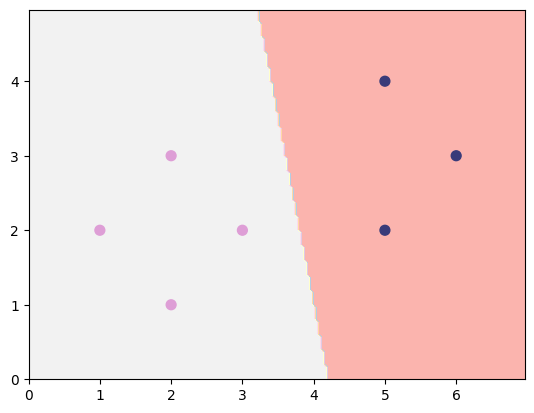

In [6]:
# Vaš kôd ovdje
ridge = RidgeClassifier(alpha = 0).fit(seven_X, seven_y)
h = lambda x : ridge.predict(x)
plot_2d_clf_problem(seven_X, seven_y, h)
print("Točnost modela: {}".format(accuracy_score(seven_y, ridge.predict(seven_X))))

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

Točnost modela: 1.0


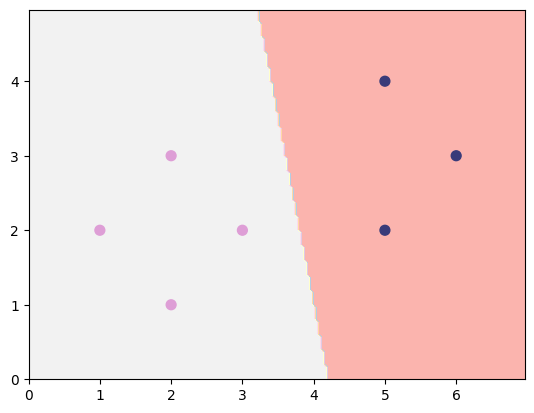

In [7]:
# Vaš kôd ovdje
model = LinearRegression().fit(seven_X, seven_y)
h = lambda x : model.predict(x) >= 0.5
plot_2d_clf_problem(seven_X, seven_y, h)
print("Točnost modela: {}".format(accuracy_score(seven_y, model.predict(seven_X) > 0.5)))

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

### (b)  

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [8]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

Točnost modela: 0.875


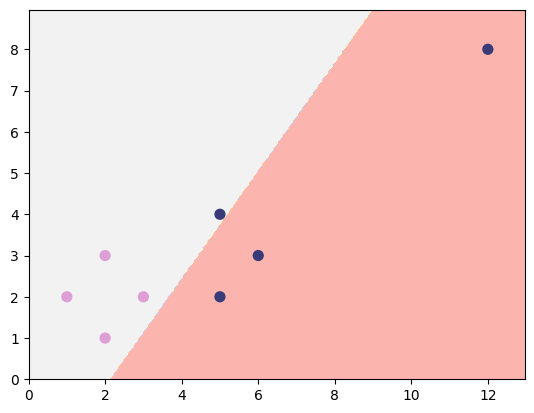

In [9]:
# Vaš kôd ovdje
modelB = LinearRegression().fit(outlier_X, outlier_y)
hB = lambda x : modelB.predict(x) >= 0.5
plot_2d_clf_problem(outlier_X, outlier_y, hB)
print("Točnost modela: {}".format(accuracy_score(outlier_y, modelB.predict(outlier_X) >= 0.5)))


**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

### (c)  

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [10]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

Točnost modela: 0.875


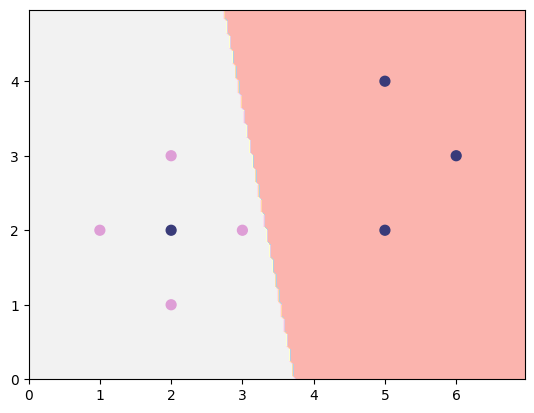

In [11]:
# Vaš kôd ovdje
modelC = LinearRegression().fit(unsep_X, unsep_y)
hC = lambda x : modelC.predict(x) >= 0.5
plot_2d_clf_problem(unsep_X, unsep_y, hC)
print("Točnost modela: {}".format(accuracy_score(unsep_y, modelC.predict(unsep_X) > 0.5)))

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

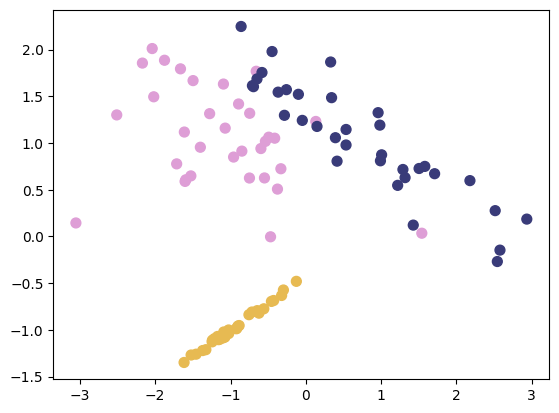

In [12]:
from sklearn.datasets import make_classification

# Vaš kôd ovdje
X, y = make_classification(n_samples = 100, n_features = 2, n_redundant = 0, n_classes = 3, n_clusters_per_class = 1)
plot_2d_clf_problem(X, y)


Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

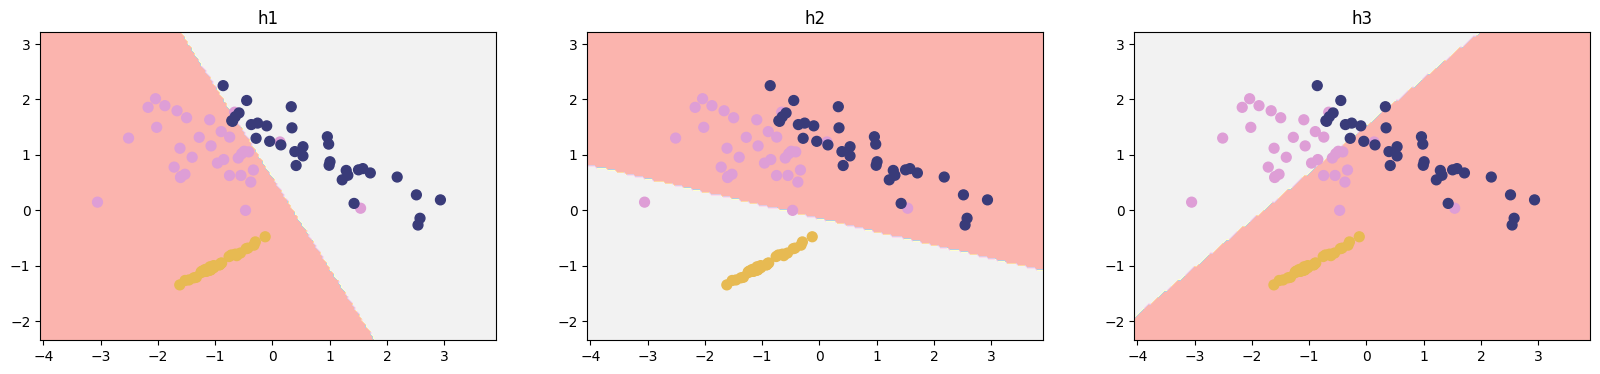

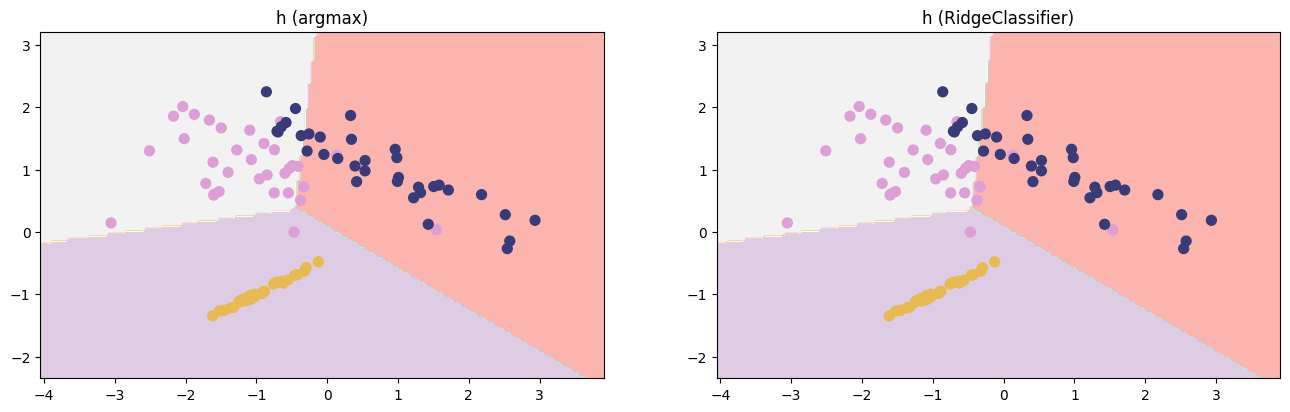

In [13]:
# Vaš kôd ovdje
y1 = []
y2 = []
y3 = []
for i in y :
    if i == 0 :
        y1.append(1)
        y2.append(0)
        y3.append(0)
    if i == 1 :
        y1.append(0)
        y2.append(1)
        y3.append(0)
    if i == 2 :
        y1.append(0)
        y2.append(0)
        y3.append(1)

model1 = LinearRegression().fit(X, y1)
h1 = lambda x: model1.predict(x) >= 0.5

model2 = LinearRegression().fit(X, y2)
h2 = lambda x: model2.predict(x) >= 0.5

model3 = LinearRegression().fit(X, y3)
h3 = lambda x: model3.predict(x) >= 0.5

plt.figure(figsize = (20, 4))
plt.subplot(1,3,1)
plt.title('h1')
plot_2d_clf_problem(X, y, h1)
plt.subplot(1,3,2)
plt.title('h2')
plot_2d_clf_problem(X, y, h2)
plt.subplot(1,3,3)
plt.title('h3')
plot_2d_clf_problem(X, y, h3)

#argmax
h = lambda x: np.argmax([model1.predict(x.reshape(1, -1)), model2.predict(x.reshape(1, -1)), model3.predict(x.reshape(1, -1))])

#RidgeClassifier
modelRC = RidgeClassifier(alpha = 0).fit(X, y)
hRC = lambda x : modelRC.predict(x)

plt.figure(figsize = (16, 4.5))
plt.subplot(1,2,1)
plt.title('h (argmax)')
plot_2d_clf_problem(X, y, h)
plt.subplot(1,2,2)
plt.title('h (RidgeClassifier)')
plot_2d_clf_problem(X, y, hRC)



### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

### (a)  

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

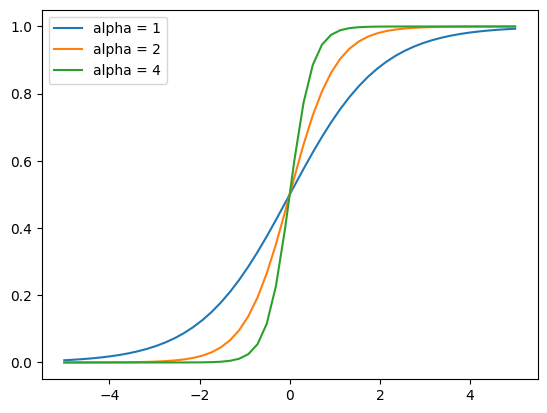

In [14]:
# Vaš kôd ovdje
sigma = lambda x : 1 / (1 + np.exp(-x))

alpha = [1, 2, 4]
x = np.linspace(-5, 5)

plt.figure()
for a in alpha:
    plt.plot(x, sigma(x*a))
plt.legend(['alpha = 1', 'alpha = 2', 'alpha = 4'], loc = 'best')

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

### (b) 

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor L2-regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [15]:
from numpy import linalg
from sklearn.preprocessing import PolynomialFeatures as PolyFeat
from sklearn.metrics import log_loss

def lr_h(x, w) :
    fi = PolyFeat(1).fit_transform(x.reshape(1,-1))
    return fi.dot(w)

def cross_entropy_error(X, y, w):
    fi = PolyFeat(1).fit_transform(X)
    return log_loss(y, sigma(fi.dot(w)))

def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False):
    # Vaš kôd ovdje
    max_iter_pom = max_iter
    last_error = 0
    w = np.zeros(len(X[0]) + 1)
    w_trace = []
    while(max_iter_pom > 0) :
        delta_w0 = 0
        delta_w = np.zeros(len(X[0]))
        for i in range(len(X)) :
            h = sigma(lr_h(X[i], w))
            delta_w0 -= h - y[i]
            delta_w -= (h - y[i]) * X[i]
        w[0] += eta * delta_w0
        w[1:] = w[1:] * (1 - eta * alpha) + eta * delta_w
        w_trace.append(w.copy())
        error = cross_entropy_error(X, y, w)
        if (abs(error - last_error) <= epsilon) :
            print("Prekinuto na iteraciji {}\n".format(max_iter - max_iter_pom))
            break
        last_error = error
        max_iter_pom -= 1
    if trace :
        return w, w_trace
    else :
        return w
        


### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

In [16]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])


Prekinuto na iteraciji 946

w = [ 4.45449454 -1.71089242  0.68413507]
Pogreška: 0.13521872720206746


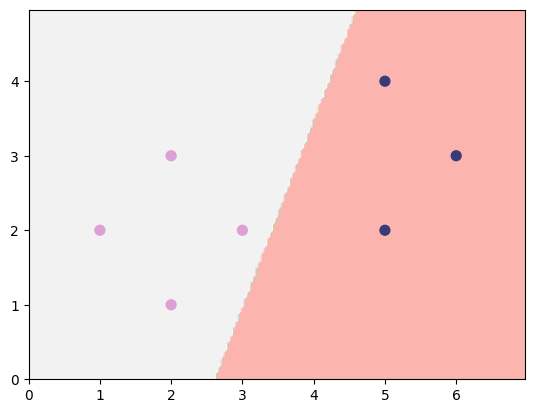

In [17]:
# Vaš kôd ovdje
w , wer= lr_train(seven_X, seven_y,trace = True)
h = lambda x : lr_h(x, w) >= 0
print("w = {}".format(w))
print("Pogreška: {}".format(cross_entropy_error(seven_X, seven_y, w)))
plot_2d_clf_problem(seven_X, seven_y, h)

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

In [18]:
from sklearn.metrics import zero_one_loss


Prekinuto na iteraciji 946

Prekinuto na iteraciji 1141

Prekinuto na iteraciji 946

Prekinuto na iteraciji 510

Prekinuto na iteraciji 377



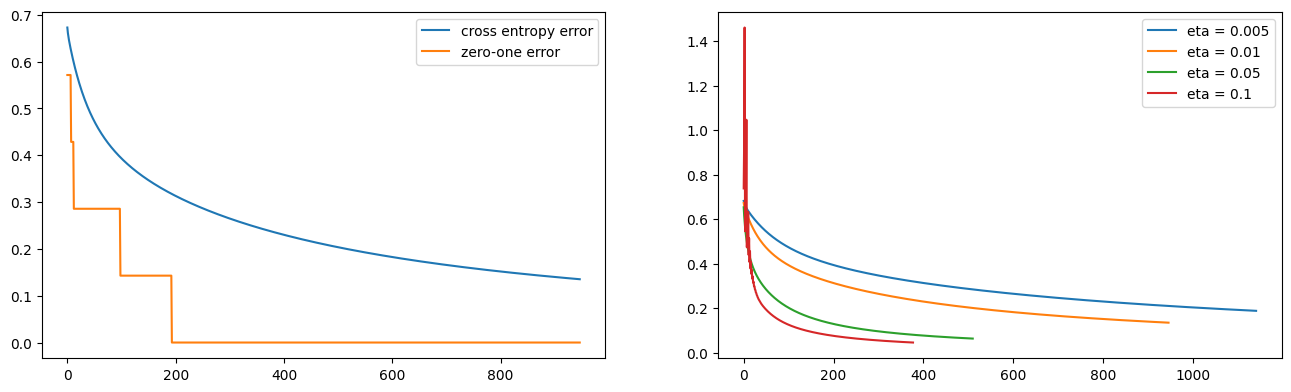

In [19]:
# Vaš kôd ovdje
w, w_trace = lr_train(seven_X, seven_y, trace=True)
x_axis = range(len(w_trace))
h = lambda x : x >= 0.5
fi = PolyFeat(1).fit_transform(seven_X)
cross_error = []
zero_one = []
for i in w_trace :
    cross_error.append(cross_entropy_error(seven_X, seven_y, i))
    zero_one.append(zero_one_loss(seven_y, h(sigma(fi.dot(i)))))

plt.figure(figsize = (16, 4.5))
plt.subplot(1,2,1)
plt.plot(x_axis, cross_error)
plt.plot(x_axis, zero_one)
plt.legend(["cross entropy error", "zero-one error"], loc = 'best')

plt.subplot(1,2,2)
eta = [0.005, 0.01, 0.05, 0.1]
for e in eta :
    cross_error = []
    w, w_trace = lr_train(seven_X, seven_y, trace=True, eta = e)
    for i in w_trace :
        cross_error.append(cross_entropy_error(seven_X, seven_y, i))
    plt.plot(range(len(cross_error)), cross_error)
plt.legend(["eta = 0.005", "eta = 0.01", "eta = 0.05", "eta = 0.1"], loc = 'best')






**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

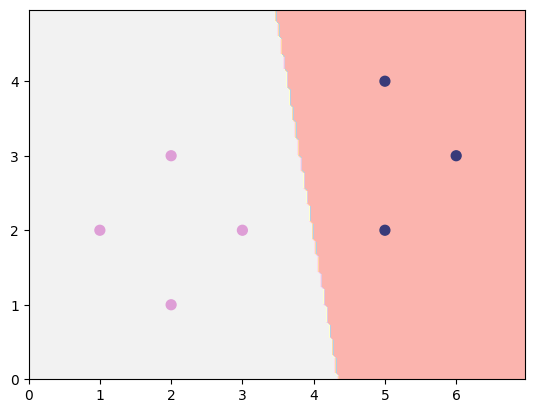

In [20]:
from sklearn.linear_model import LogisticRegression

# Vaš kôd ovdje
model = LogisticRegression(max_iter = 2000, tol = 0.0001, C = 0.01**-1).fit(seven_X, seven_y)
h = lambda x : model.predict(x)
plot_2d_clf_problem(seven_X, seven_y, h)


### 4. Analiza logističke regresije

### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier`. Prikažite granicu između klasa.

In [21]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

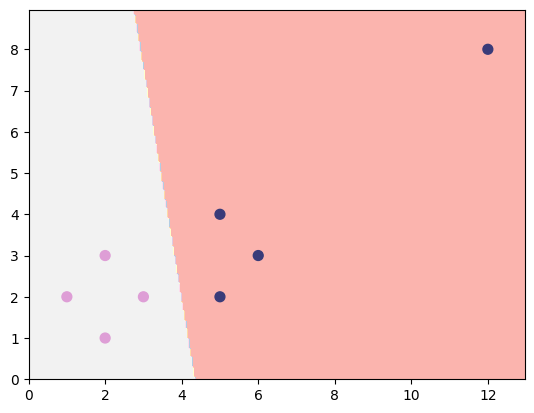

In [22]:
# Vaš kôd ovdje
model = LogisticRegression(max_iter = 2000, tol = 0.0001, C = 0.01**-1).fit(outlier_X, outlier_y)
h = lambda x : model.predict(x)
plot_2d_clf_problem(outlier_X, outlier_y, h)

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.

Prekinuto na iteraciji 946

w = [ 4.45449454 -1.71089242  0.68413507]


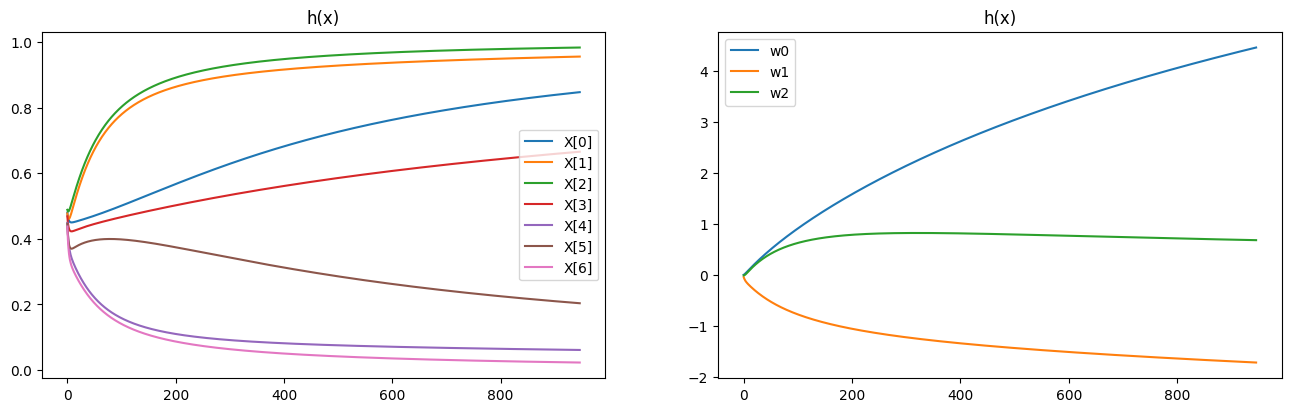

In [26]:
# Vaš kôd ovdje
w, w_trace = lr_train(seven_X, seven_y, trace = True)
w0 = []
w1 = []
w2 = []
h = []

for i in w_trace :
    w0.append(i[0])
    w1.append(i[1])
    w2.append(i[2])
    fi = PolyFeat(1).fit_transform(seven_X)
    h.append(sigma(fi.dot(i)))

print("w = {}".format(w))
plt.figure(figsize = (16, 4.5))
plt.subplot(1,2,1)
plt.plot(range(len(h)), h)
plt.title("h(x)")
plt.legend(["X[0]", "X[1]", "X[2]", "X[3]", "X[4]", "X[5]", "X[6]"], loc = 'best')
plt.subplot(1,2,2)
plt.plot(range(len(w0)), w0)
plt.plot(range(len(w0)), w1)
plt.plot(range(len(w0)), w2)
plt.title("h(x)")
plt.legend(["w0", "w1", "w2"], loc = 'best')


### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep`.

In [27]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

Prekinuto na iteraciji 453

w = [ 2.10352878 -1.0785606   0.45549163]


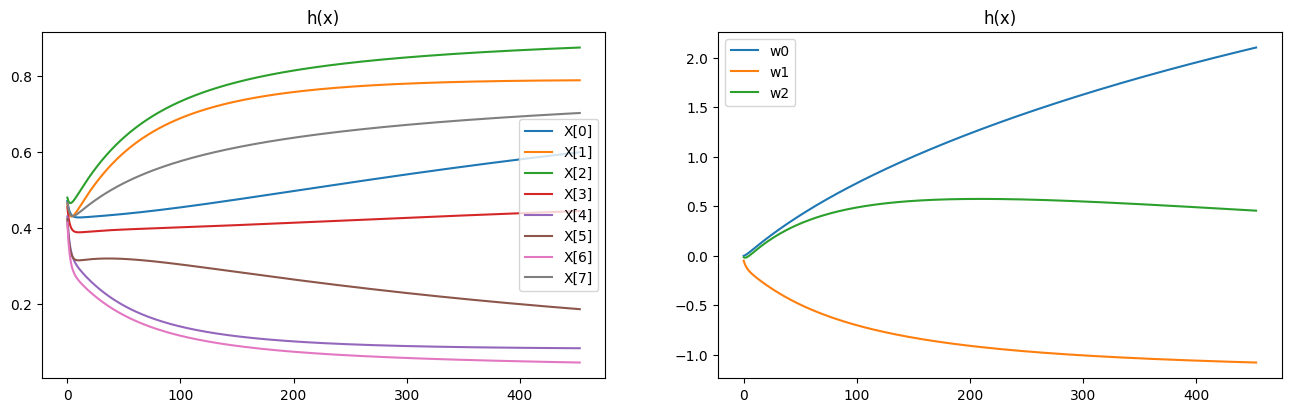

In [30]:
# Vaš kôd ovdje

w, w_trace = lr_train(unsep_X, unsep_y, trace = True)
w0 = []
w1 = []
w2 = []
h = []

for i in w_trace :
    w0.append(i[0])
    w1.append(i[1])
    w2.append(i[2])
    fi = PolyFeat(1).fit_transform(unsep_X)
    h.append(sigma(fi.dot(i)))

print("w = {}".format(w))
plt.figure(figsize = (16, 4.5))
plt.subplot(1,2,1)
plt.plot(range(len(h)), h)
plt.title("h(x)")
plt.legend(["X[0]", "X[1]", "X[2]", "X[3]", "X[4]", "X[5]", "X[6]", "X[7]"], loc = 'best')
plt.subplot(1,2,2)
plt.plot(range(len(w0)), w0)
plt.plot(range(len(w0)), w1)
plt.plot(range(len(w0)), w2)
plt.title("h(x)")
plt.legend(["w0", "w1", "w2"], loc = 'best')


**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

In [ ]:
from numpy.linalg import norm

Prekinuto na iteraciji 946

Prekinuto na iteraciji 803

Prekinuto na iteraciji 404

Prekinuto na iteraciji 3



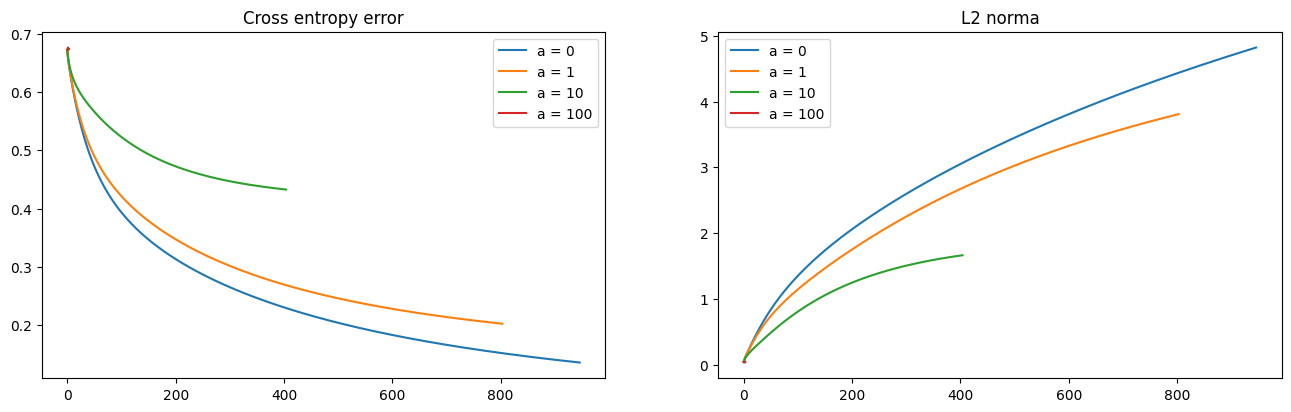

In [ ]:
# Vaš kôd ovdje
alpha = [0, 1, 10, 100]
error = []
norm = []

for a in alpha :
    w, w_trace = lr_train(seven_X, seven_y, trace = True, alpha = a)
    cross_error = []
    L2 = []
    for i in w_trace :
        cross_error.append(cross_entropy_error(seven_X, seven_y, i))
        L2.append(linalg.norm(i))
    error.append(cross_error)
    norm.append(L2)

plt.figure(figsize = (16, 4.5))
plt.subplot(1,2,1)
for e in error :
    plt.plot(range(len(e)), e)
plt.title("Cross entropy error")
plt.legend(["a = 0", "a = 1", "a = 10", "a = 100"], loc = 'best')

plt.subplot(1,2,2)
for n in norm :
    plt.plot(range(len(n)), n)
plt.title("L2 norma")
plt.legend(["a = 0", "a = 1", "a = 10", "a = 100"], loc = 'best')


**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

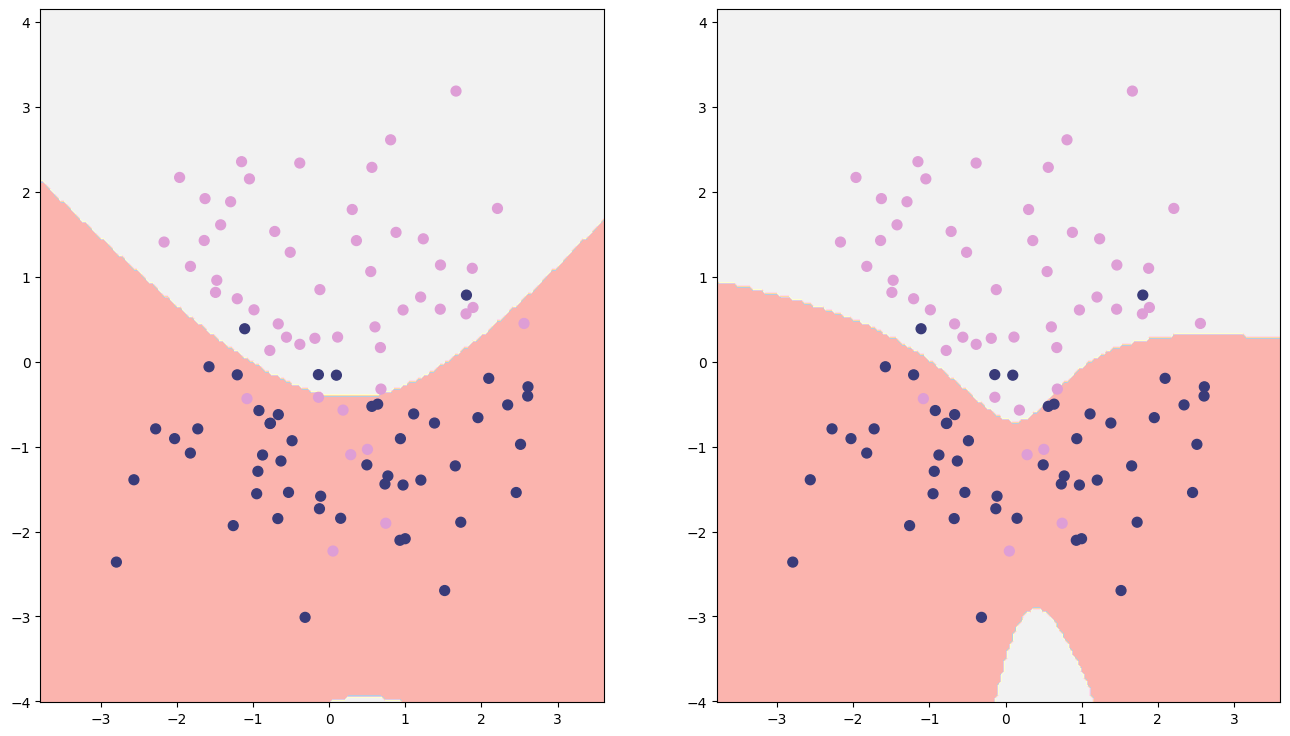

In [ ]:
from sklearn.datasets import make_classification

# Vaš kôd ovdje
d = [2, 3]
X, y = make_classification(n_samples = 100, n_features = 2, n_clusters_per_class = 2, n_redundant = 0)
plt.figure(figsize=(16, 9))
for i in range(len(d)) :
    poly = PolyFeat(d[i])
    fi = poly.fit_transform(X)
    model = LogisticRegression().fit(fi, y)
    h = lambda x : model.predict(poly.transform(x))
    plt.subplot(1, 2, i + 1)
    plot_2d_clf_problem(X, y, h)



**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?